In [20]:
import pandas as pd
import geopandas as gpd

In [2]:
filename = 'Vehicle_traffic_intensity.geojson'
file = open(filename, 'rb')
df_traffic = gpd.read_file(file)
file.close()

In [197]:
df_traffic.head()

,ObjectId,id,car_2016,truc_2016,car_2017,truc_2017,car_2018,truc_2018,car_2019,truc_2019,car_2020,truc_2020,datum_exportu,GlobalID,SHAPE_Length,geometry
0,1,43,4,5,4,5,4,5,4,5,4,5,2022-04-07T00:00:00,{224F8442-FA09-40AB-99A0-BE6DA5E1D433},0.006235,"MULTILINESTRING ((16.60537 49.20589, 16.60192 ..."
1,2,35,17,4,17,4,17,4,17,4,17,6,2022-04-07T00:00:00,{E18B220C-895C-4D18-BDA0-02F65F997D79},0.002004,"MULTILINESTRING ((16.60537 49.20589, 16.60639 ..."
2,3,37,17,4,17,4,17,4,17,4,17,6,2022-04-07T00:00:00,{010FF252-AFC9-4504-B2A9-2CB29418688F},0.000436,"MULTILINESTRING ((16.60639 49.20417, 16.60662 ..."
3,4,372,2,13,2,12,2,12,2,12,2,12,2022-04-07T00:00:00,{27708839-B408-42DC-922C-406ED375C1B5},0.006817,"MULTILINESTRING ((16.56534 49.26404, 16.56631 ..."
4,5,40,3,4,3,4,3,4,3,4,3,4,2022-04-07T00:00:00,{FC50197E-6744-40CD-B41E-27D017C89560},0.005153,"MULTILINESTRING ((16.60662 49.20380, 16.60571 ..."


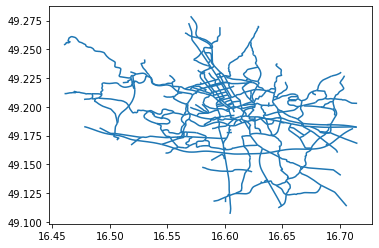

In [44]:
df_traffic.plot()

In [62]:
df_traffic_buffer = df_traffic.buffer(distance=0.003)

In [63]:
df_traffic_buffer

0      POLYGON ((16.60316 49.20208, 16.60291 49.20195...
1      POLYGON ((16.60897 49.20569, 16.60911 49.20542...
2      POLYGON ((16.60915 49.20542, 16.60929 49.20517...
3      POLYGON ((16.56535 49.26101, 16.56496 49.26106...
4      POLYGON ((16.60707 49.20066, 16.60695 49.20060...
                             ...                        
584    POLYGON ((16.66786 49.18164, 16.66761 49.18162...
585    POLYGON ((16.66521 49.18422, 16.66518 49.18442...
586    POLYGON ((16.69043 49.18767, 16.69044 49.18768...
587    POLYGON ((16.68527 49.16662, 16.68526 49.16673...
588    POLYGON ((16.59984 49.12248, 16.59980 49.12275...
Length: 589, dtype: geometry

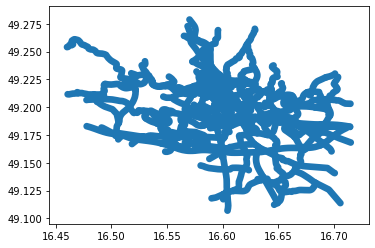

In [67]:
df_traffic_buffer.plot()

In [12]:
filename = 'Address_points.geojson'
file = open(filename, 'rb')
df_address = gpd.read_file(file)
file.close()

In [170]:
df_address['geometry'].head()

0    POINT (16.61924 49.19793)
1    POINT (16.63468 49.21201)
2    POINT (16.59985 49.20092)
3    POINT (16.61835 49.23407)
4    POINT (16.63475 49.19491)
Name: geometry, dtype: geometry

In [32]:
df_address.shape

(62551, 13)

In [85]:
df_traffic_buffer.head()

0    POLYGON ((16.60316 49.20208, 16.60291 49.20195...
1    POLYGON ((16.60897 49.20569, 16.60911 49.20542...
2    POLYGON ((16.60915 49.20542, 16.60929 49.20517...
3    POLYGON ((16.56535 49.26101, 16.56496 49.26106...
4    POLYGON ((16.60707 49.20066, 16.60695 49.20060...
dtype: geometry

### unasable

df_address['is_in_traffic_line'] = df_address.geometry.within(df_traffic_buffer.geometry)

df_address[df_address['is_in_traffic_line'] == True]

In [96]:
_pnts = df_address.geometry
df_address_temp = df_address
df_address_temp = df_address_temp.assign(**{str(key): df_address_temp.within(geometry) for key, geometry in df_traffic_buffer.items()})

In [98]:
df_address_temp.head()

,ObjectId,obec_nazev,cislo_domovni,cislo_orientacni_hodnota,cislo_orientacni_pismeno,ulice_nazev,cobce_nazev,psc,stavobj_kod,puvod,...,579,580,581,582,583,584,585,586,587,588
0,1,Brno,503.0,36.0,None,Cejl,Zábrdovice,60200.0,19023804,geometrie z DMB,...,False,False,False,False,False,False,False,False,False,False
1,2,Brno,168.0,51.0,None,Dukelská třída,Husovice,61400.0,19074514,geometrie z DMB,...,False,False,False,False,False,False,False,False,False,False
2,3,Brno,471.0,29.0,None,Veveří,Veveří,60200.0,19009470,geometrie z DMB,...,False,False,False,False,False,False,False,False,False,False
3,4,Brno,557.0,18.0,None,Jurkovičova,Lesná,63800.0,19094621,geometrie z DMB,...,False,False,False,False,False,False,False,False,False,False
4,5,Brno,3280.0,24.0,None,Šámalova,Židenice,61500.0,19446969,geometrie z DMB,...,False,False,False,False,False,False,False,False,False,False


In [113]:
df_address_temp.shape

(62551, 603)

In [180]:
df_address_bool = df_address_temp.iloc[:,14:]

In [181]:
address_roads = df_address_bool.apply(lambda address: address[address==True].index, axis=1)

In [182]:
address_roads

0             Index(['503', '507', '510'], dtype='object')
1        Index(['96', '97', '117', '118', '131', '132',...
2        Index(['0', '4', '7', '10', '12', '13', '15', ...
3                      Index(['76', '77'], dtype='object')
4             Index(['153', '154', '216'], dtype='object')
                               ...                        
62546                            Index([], dtype='object')
62547                Index(['174', '175'], dtype='object')
62548                       Index(['253'], dtype='object')
62549                       Index(['320'], dtype='object')
62550         Index(['155', '156', '569'], dtype='object')
Length: 62551, dtype: object

help(address_roads[0].values)

from statistics import mean

indices = [int(item) for item in address_roads[0].values]

print('address_roads[0] ' + str(indices))
print('hello ' + str(df_traffic.iloc[indices, 10]))

print('list ' + str(list(df_traffic.iloc[indices, 10])))

mean(df_traffic.iloc[indices, 10])

# score

In [243]:
from statistics import mean
#df_address_temp['traffic_score'] = mean(df_traffic.loc[list(address_roads),'car_2020'])
for i in range(df_address_temp.shape[0]):
    indices = [int(item) for item in address_roads[i].values]
    if indices:
        df_address_temp.loc[i, 'traffic_score'] = mean(df_traffic.iloc[indices, 10])

In [245]:
df_address_temp['traffic_score'].to_csv('traffic.csv')

/home/marosj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [238]:
df_address_temp.loc[0, 'traffic_score']

7.333333333333333

%%timeit
[key for key in list(df_address_temp.keys())[1:-1] if df_address_temp.loc[0,:][key] == True]

test_ind = [int(key) for key in list(df_address_temp.keys()) if str(df_address_temp.loc[0,:][key]) == 'True']

df_traffic['car_2020'][test_ind]

from statistics import mean

df_address_temp.keys()

addr_keys = list(df_address_temp.keys())
#print(addr_keys)
addr_keys[14:]

df_address['traffic_id'] = ''

for i in range(df_address.shape[0]):
    #print(df_address_temp.iloc[i,:15])
    list_traffics_indx = [str(key) for key in list(df_address_temp.keys())[14:] if df_address_temp.loc[i,:][key] == True]
    #print(list_traffics_indx)
    if list_traffics_indx:
        df_address.at[i, 'traffic_id'] = str(list_traffics_indx)#','.join(list_traffics_indx)
        #mean(df_traffic['car_2020'][list_traffics_indx])
    #else:
    #    df_address.at[i, 'traffic_id'] = -1

In [112]:
print(df_traffic.iloc[503])

ObjectId                                                       504
id                                                             416
car_2016                                                         3
truc_2016                                                        6
car_2017                                                         3
truc_2017                                                        6
car_2018                                                         3
truc_2018                                                        6
car_2019                                                         3
truc_2019                                                        6
car_2020                                                         3
truc_2020                                                        3
datum_exportu                                  2022-04-07T00:00:00
GlobalID                    {B8337481-A7B9-4004-A098-AC7FFEAF0FD8}
SHAPE_Length                                            0.0052

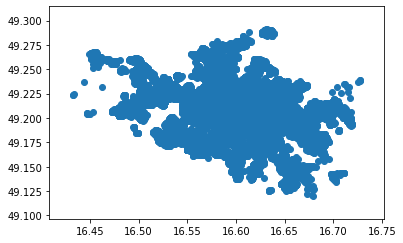

In [36]:
df_address.plot()

In [24]:
from dash import Dash, html
import dash_leaflet as dl
import dash_leaflet.express as dlx
import pandas as pd
from dash_extensions.javascript import assign

color_prop = 'ObjectId'

df = pd.read_csv('assets/adresní_místa___Address_points.csv')

# traffic
metric_folder = 'datasets_computations/dataset_outputs/'
df_traffic = pd.read_csv(metric_folder+'traffic.csv', index_col=0, header=None)
df['trafic_score'] = df_traffic.loc[:,1]
df['trafic_score'] = df['trafic_score'].fillna(0)
df['trafic_score_rel'] = df['trafic_score']/df['trafic_score'].abs().max()

# skolky
df_skolka = pd.read_csv(metric_folder + 'skolky.csv', index_col=0, header=None)
df_skolka_join = df.join(df_skolka, how='left')
df['skolka_score'] = df_skolka_join.loc[:,1]
df['skolka_score'] = df['skolka_score'].fillna(0)
df['skolka_score_rel'] = df['skolka_score']/df['skolka_score'].abs().max()

# prach
df_prach = pd.read_csv(metric_folder + 'particles.csv')
df['prach'] = df_prach['pm10_1h']
df['prach_rel'] = (df['prach'] - df['prach'].min())/(df['prach'] - df['prach'].min()).abs().max()

# brownies
df_brownies = pd.read_csv(metric_folder + 'brownfields.csv', index_col=0, header=None)
df_brownies_join = df.join(df_brownies, how='left')
df['brownies_score'] = df_brownies_join.loc[:,1]
df['brownies_score'] = df['brownies_score'].fillna(0)
df['brownies_score_rel'] = df['brownies_score']/df['brownies_score'].abs().max()

def get_final_score(w_skolka, w_traffic, w_brownies, w_prach):
    df['final'] = w_skolka * df['skolka_score_rel'] - w_traffic * df['trafic_score_rel'] - w_brownies * df['brownies_score_rel'] - w_prach * df['prach_rel']
    
    if df['final'].min() < 0:
        df['final'] = df['final'] - df['final'].min()
        df['final_rel'] = ((df['final']/df['final'].abs().max())*10).round().astype(int)
    elif df['final'].min() > 0:
        df['final'] = df['final'] - df['final'].min()
        df['final_rel'] = ((df['final']/df['final'].abs().max())*10).round().astype(int)
    else:
        df['final_rel'] = ((df['final']/df['final'].abs().max())*10).round().astype(int)